<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:skyblue;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Profit Forecasting for a Thousand Companies Using R&D, Administration, and Marketing Expenditure</p> 

# Project introduction


With the market becoming more competitive and inflation rates rising businesses are finding themselves spending more in areas like research and development (R&D), administration and marketing. An essential question that arises is whether these investments in these key areas yield a good return on investment (ROI) and contribute to profit growth. For instance, when higher spending on marketing fails to translate into higher profits, the company needs to reassed its spending and marketing strategies to optimize budget allocation while enhancing marketing efficiency.

The primary objective of this project is to investigate the relationships between expenditures in R&D, administration, marketing, and their impact on overall profit. We also aim to use spending and investment in these areas to make a prediction of profits, both known profits and unknown profits in the future.

The project has these following key objectives:

* Identify variables among R&D Spend, Administration Spend and Marketing Spend that correlate with the company profits

* Build a machine learning model to predict profits from these variables which we can also use to predict unknown profits from available spending numbers.

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:skyblue;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data overview</p> 

In [1]:
#import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

This project uses a dataset containing information about R&D spending, Administration Spend, and Marketing Spend for the top 1000 startups in the US. Each row in the dataset represents a single company's data aggregated by month. The spending data for each area includes factors like personnel, tools, partnerships, and more. The dataset comprises 1000 rows and 5 columns, with 4 columns serving as independent variables, and the fifth column, which represents profit, is the dependent variable. Since this project primarily deals with continuous variables and aims to utilize numerical variables for predicting the profit, we will exclude the categorical variable "State", which allows the project to concentrate on exploring the relationships between the remaining variables and profit.

In [2]:
data = pd.read_csv('/kaggle/input/companydataset/1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#remove the State column
data = data.drop('State', axis=1)
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [4]:
data.rename(columns={'Administration':'Administration Spend'}, inplace=True)
data

,R&D Spend,Administration Spend,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   R&D Spend             1000 non-null   float64
 1   Administration Spend  1000 non-null   float64
 2   Marketing Spend       1000 non-null   float64
 3   Profit                1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [6]:
data.describe()

,R&D Spend,Administration Spend,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:skyblue;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis</p> 

## Correlation between independent variables (R&D, Administration, and Marketing Spend) with the target variable Profit

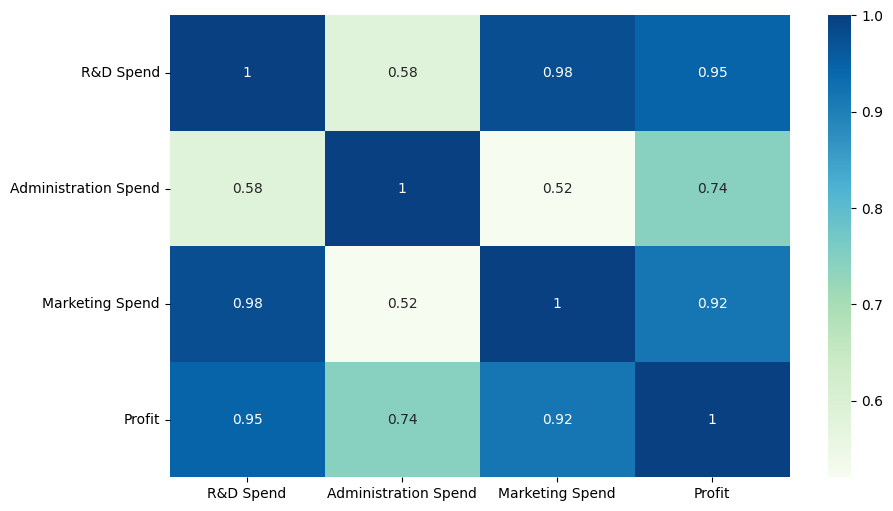

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='GnBu')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


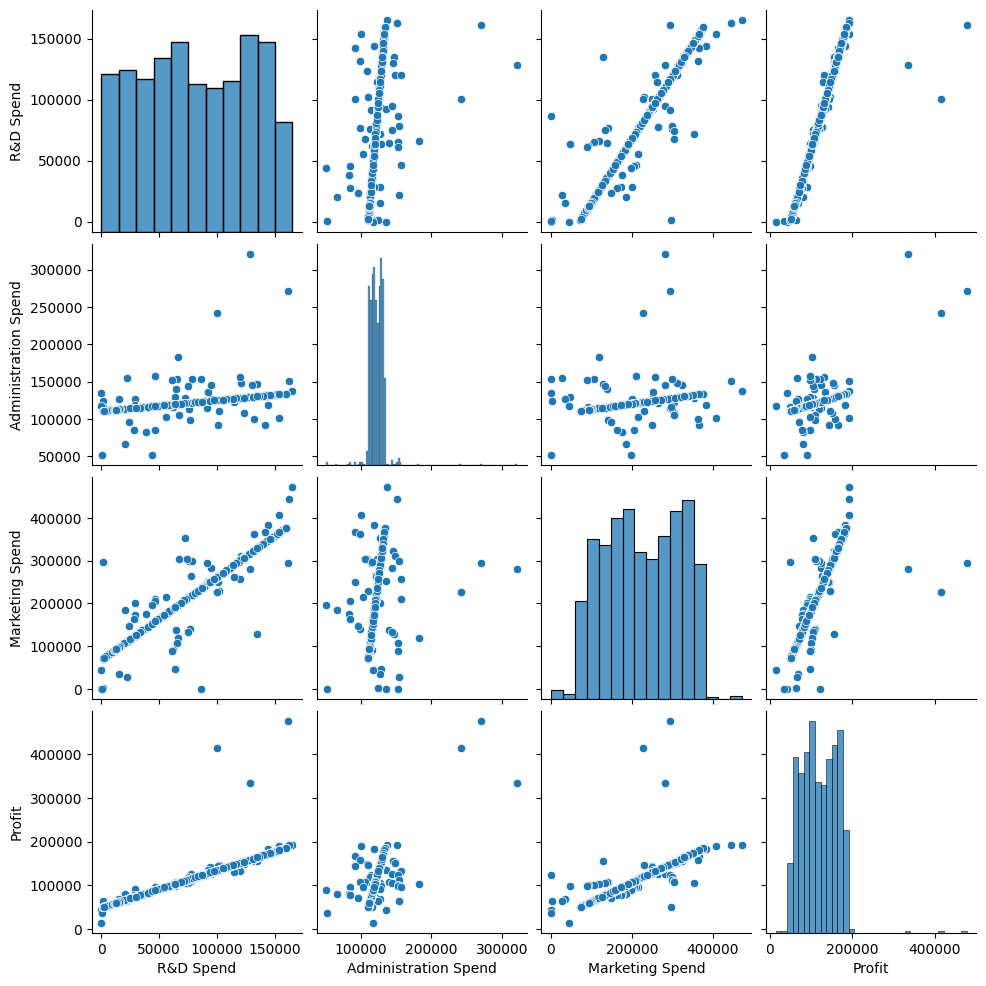

In [8]:
sns.pairplot(data=data)
plt.tight_layout
plt.show()

R&D Spend and Marketing Spend exhibit strong positive correlations with profits, scoring the coefficients of 0.95 and 0.92, respectively. Additionally, Administration Spend shows a positive correlation with profit with the coefficient as 0.74.

## Data distribution of each variable

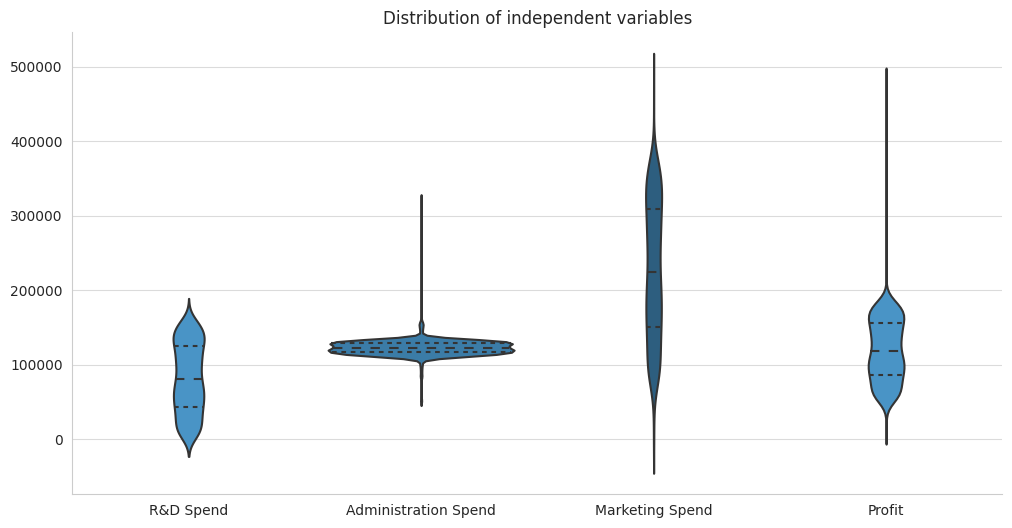

In [9]:
#plot the data distribution of R&D, administration and marketing spend
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data, palette=["#3498db", "#2980b9", "#1f618d"], inner="quartile")
    plt.title("Distribution of independent variables")
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.grid(axis='y', linestyle='-', alpha=0.7)


The violin plot helped to compare the distribution of data between different variables and gain a better understanding of the data's spread, central tendency, and shape within each of them. Among the three numerical variables examined, it is evident that marketing spend has the highest mean, a wider range of value distributions, and a higher number of outliers compared to the others. This observation aligns with the nature of marketing expenses, as they tend to vary significantly between companies. Marketing expenditures are influenced by diverse strategies targeting different markets, product portfolios, and company sizes. Larger companies typically allocate substantial resources to marketing, while smaller ones, reliant on organic channels or constrained budgets, may allocate minimal or even zero funds to this domain, resulting in numerous outliers in the data distribution.

Additionally, the variable "Profit" also displays many outliers, with its mean closely approximating the mean of administration spend across all companies.

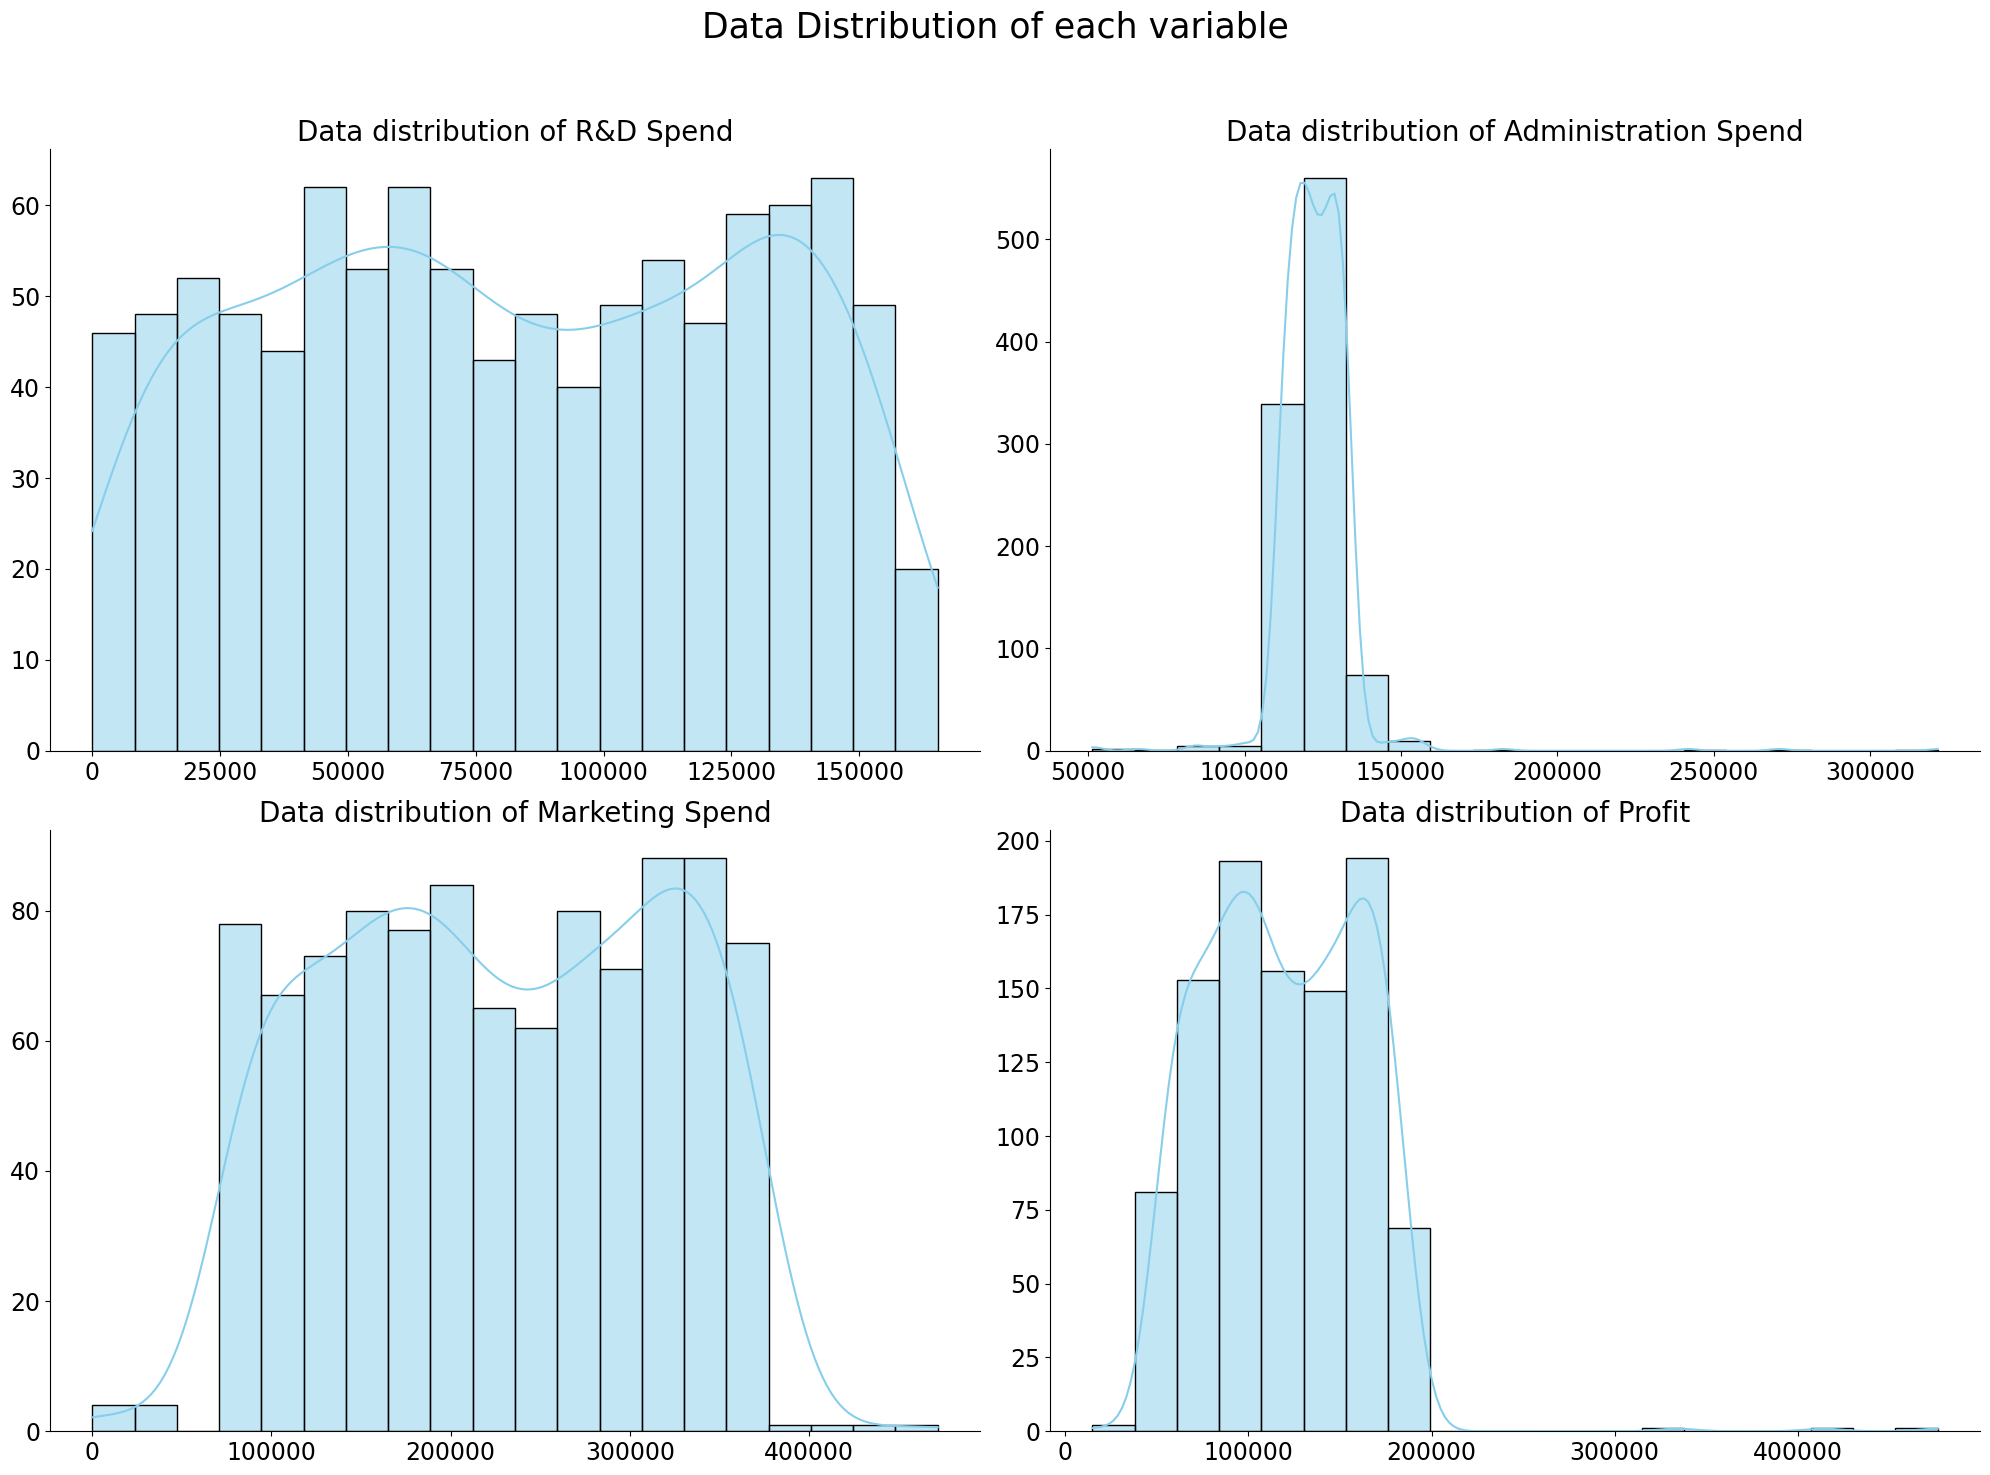

In [10]:
sns.set_palette("pastel")
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Data Distribution of each variable', fontsize=25)
axes = axes.flatten()
for i, col in enumerate(data.columns):
    sns.histplot(data=data[col], bins=20, ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(f'Data distribution of {col}', fontsize=20)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='both', labelsize=17)
    sns.despine(ax=axes[i]) 
if len(data.columns) < len(axes):
    for j in range(len(data.columns), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0, 1, 0.95])

A closer examination into the violin plot shows that Marketing expenditure has the broadest range of data. Profit also demonstrates a significant spread, with the majority of values falling between 40,000 and 200,000 and outliers surpassing 3,000,000. The minimum recorded company spending on administration is 50,000, which aligns with the expectation that all growing companies must allocate funds for employee salaries.

Skewness of R&D Spend: -0.02
Skewness of Administration Spend: 6.0
Skewness of Marketing Spend: -0.05
Skewness of Profit: 0.96


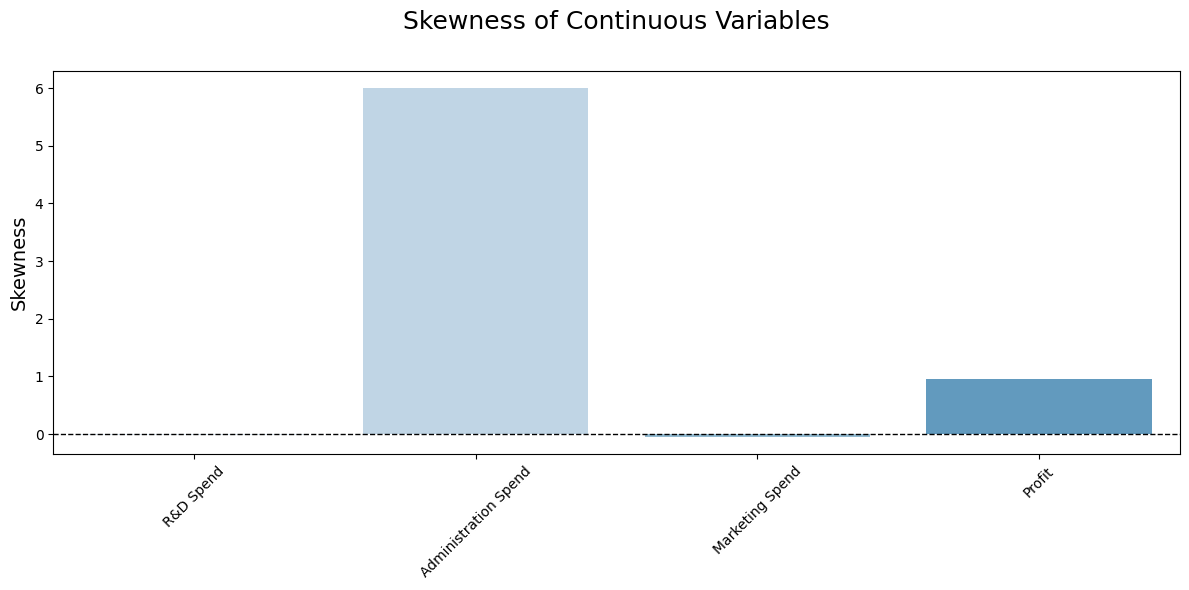

In [11]:
#plot the skewness of each variable
sk = {}

sns.set_palette("Blues")
plt.figure(figsize=(12, 6))  

for col in data.columns:
    skewness = round(data[col].skew(),2)
    print(f"Skewness of {col}: {skewness}")
    sk[col] = skewness

ax = sns.barplot(x=list(sk.keys()), y=list(sk.values()))
ax.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title("Skewness of Continuous Variables", fontsize=18, pad=30)
plt.xticks(rotation=45)
plt.ylabel("Skewness", fontsize=14)
plt.tight_layout()

Skewness is a measure of the data distribution shape. Administration spend and profit with skewness bigger than zero with skewness measures as 6 and 0.96 respectively mean that there are more weight in the left tail of their data distribution. R&D spend and marketing spend with skewness smaller than zero signals that there's slightly more weight in the right tail of the data spread, meaning there are more bigger values than small values in R&D and marketing expenditure.

Kurtosis of R&D Spend: -1.23
Kurtosis of Administration Spend: 89.96
Kurtosis of Marketing Spend: -1.1
Kurtosis of Profit: 6.03


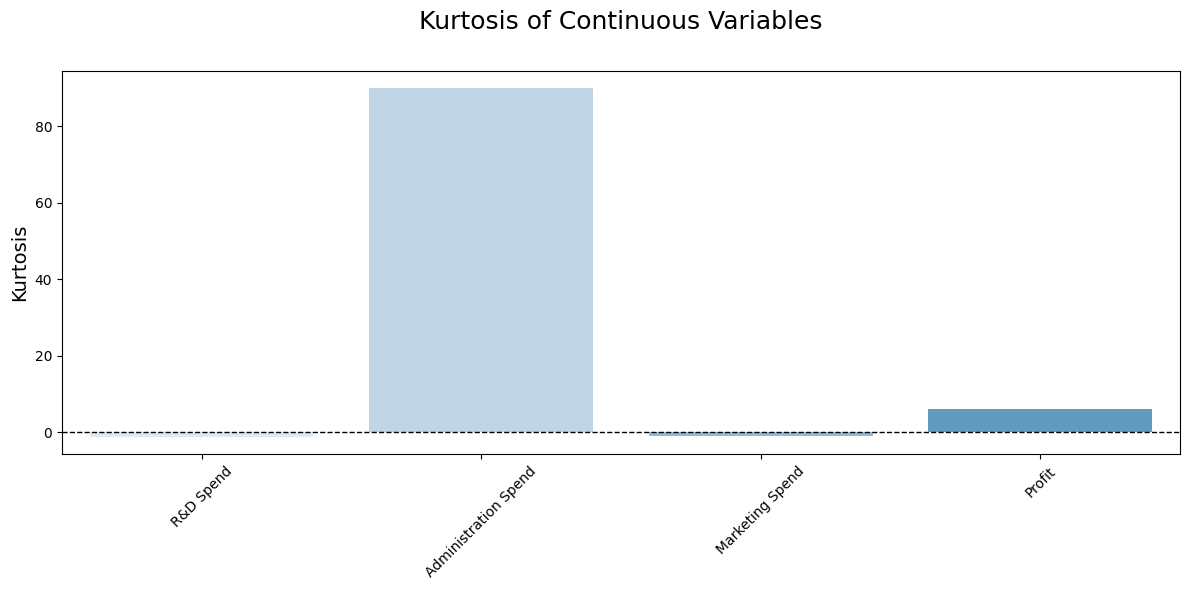

In [12]:
#plot the kurtosis of each variable
sk = {}

sns.set_palette("Blues")
plt.figure(figsize=(12, 6))  

for col in data.columns:
    kurtosis = round(data[col].kurt(),2)
    print(f"Kurtosis of {col}: {kurtosis}")
    sk[col] = kurtosis

ax = sns.barplot(x=list(sk.keys()), y=list(sk.values()))
ax.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title("Kurtosis of Continuous Variables", fontsize=18, pad=30)
plt.xticks(rotation=45)
plt.ylabel("Kurtosis", fontsize=14)
plt.tight_layout()

Kurtosis measure helps to quantify the shape of the data distribution. The Kurtosis barchart mirrors the skewness one. Administration and profit with positive kurtosis indicates heavier tails in the data spread. R&D and Marketing spend has negative kurtosis, showing that they have flat distribution of data and there aren't extremely large or small values.

<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:skyblue;margin:0;color:white;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data modeling: Build a model to predict profits</p> 

The final stage is to build a data predictive model to forecast profits based on the rest of numerical variables: R&D, Administration and Marketing spend. For the same companies and other companies, this model can be used to predict profist based on known inputs like spending and we can tell if the profit align with the stakeholders' expectations and otherwise, what actions the company can do to make sure the profit making progress is back to the right track.

Linear regression and Random forest regression models will be built to solve this regression question and we'll compare the relevant accurary metrics to choose the model that perform better for unseen data aka test data.

## Linear Regression Modeling

In [13]:
#Separate input feature and target variable into X and y
X = data.drop('Profit',axis=1)
y = data['Profit']
X,y

(     R&D Spend  Administration Spend  Marketing Spend
 0    165349.20            136897.800      471784.1000
 1    162597.70            151377.590      443898.5300
 2    153441.51            101145.550      407934.5400
 3    144372.41            118671.850      383199.6200
 4    142107.34             91391.770      366168.4200
 ..         ...                   ...              ...
 995   54135.00            118451.999      173232.6695
 996  134970.00            130390.080      329204.0228
 997  100275.47            241926.310      227142.8200
 998  128456.23            321652.140      281692.3200
 999  161181.72            270939.860      295442.1700
 
 [1000 rows x 3 columns],
 0      192261.83000
 1      191792.06000
 2      191050.39000
 3      182901.99000
 4      166187.94000
            ...     
 995     95279.96251
 996    164336.60550
 997    413956.48000
 998    333962.19000
 999    476485.43000
 Name: Profit, Length: 1000, dtype: float64)

In [14]:
#split train and test data to allow the randomization and ensure we have a test subset of data to test the performance of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<Axes: title={'center': 'Testing profit distribution'}>

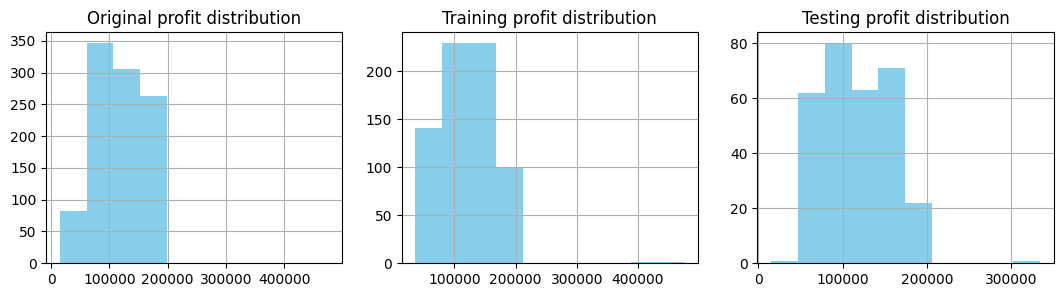

In [15]:
#plot the train and test data to check the test data size (which is 30% of the total dataset)
plt.figure(figsize=(13, 3))
plt.subplot(1, 3, 1)
data['Profit'].hist(color='skyblue')
plt.title("Original profit distribution")

plt.subplot(1, 3, 2)
plt.title("Training profit distribution")
y_train.hist(color='skyblue')

plt.subplot(1, 3, 3)
plt.title("Testing profit distribution")
y_test.hist(color='skyblue')

In [26]:
#initialize a linear regression model, fit the model to training data and use the model to predict profit values for the test set
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pred_linear=linear_model.predict(X_test)
y_pred_linear

array([124621.39982006, 111607.21122453,  91716.37713152, 127199.28746741,
       161367.19316779,  91787.29678819, 154409.37434085, 138942.90291887,
        87999.50222008,  91484.82000081, 167751.67329922, 163093.19020165,
       105172.31829254, 108053.53720532,  91969.29547404, 159606.16348078,
       116623.71050172, 104507.55320129, 120312.3884195 , 105502.9920789 ,
        75787.64603788, 125623.67435716,  65522.23587476,  70337.08408271,
       170021.95744516, 164243.28524418, 177830.81241285, 135161.9441326 ,
       122268.23352157, 162142.18293784, 145106.07946469, 113233.23713533,
       165478.82574042, 141428.50957537,  65545.30615439,  88994.08674731,
        82168.7082784 ,  74394.88608621, 116610.89377782, 169927.11315848,
        60708.24226243,  89055.60744866, 121491.53492842, 141699.37148349,
       168294.25158819, 147281.51932395, 152248.46027863, 138377.25435027,
       141535.31635793,  74666.60233939, 114331.2105542 ,  62871.71962155,
       171244.68108983, 1

In [17]:
#calculate coefficients of the linear regression equations for each input variables
print(linear_model.coef_.round(2))

[0.57 1.22 0.05]


In [18]:
print(linear_model.intercept_.round(2))

-89440.12


In [19]:
#evaluate the accuracy of the test prediction with mean_squared_error, mean_absolute_error, and r2 score
r2_test_linear = r2_score(y_test, y_pred_linear).round(2)
mse_test_linear = mean_squared_error(y_test, y_pred_linear).round(2)
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear)).round(2)
mae_test_linear = mean_absolute_error(y_test, y_pred_linear).round(2)
print('R2 Score  : ', r2_test_linear)
print('MSE       : ', mse_test_linear)
print('RMSE      : ', rmse_test_linear)
print('MAE       : ', mae_test_linear)

R2 Score  :  0.96
MSE       :  62027830.27
RMSE      :  7875.77
MAE       :  1992.18


## Random Forest Regression Modeling

In [30]:
#Initiate a random forest regression model, fit the model to training data and use the model to predict profit variable for test set
model_RandomForestRegressor = RandomForestRegressor(n_estimators = 300, max_depth = 7,random_state=42)
model_RandomForestRegressor.fit(X_train, y_train)

# Finally, predict on test data
pred_test_random = model_RandomForestRegressor.predict(X_test)
pred_test_random


array([124504.41728707, 111100.5302249 ,  91732.43024308, 126898.23414935,
       161196.49564854,  91833.63460561, 154236.18188708, 138577.09344958,
        87575.42832455,  90710.69053982, 167325.07758686, 162614.733211  ,
       104885.90623773, 107741.79218173,  91918.62836472, 159375.86750119,
       116324.58160171, 104140.43400725, 120075.07770765, 104934.98652645,
        76369.74268206, 125809.8456472 ,  64933.47279068,  70388.20939066,
       169307.00308531, 163367.22268184, 177610.66428212, 135538.89426986,
       122049.91833321, 161548.57040159, 144682.29322274, 112949.89306577,
       165137.0006974 , 141056.16168094,  64933.47279068,  88717.28442659,
        82186.14246348,  74101.98623462, 116311.89483724, 169293.04893925,
        60090.52727437,  88741.60082625, 121189.78717952, 141252.80675904,
       168453.71541231, 146582.86774439, 152019.30321369, 137789.7503641 ,
       141158.34595182,  74270.96635237, 114638.86117691,  63267.84557605,
       171137.13403952, 1

In [21]:
r2_test_random = r2_score(y_test, pred_test_random).round(2)
mse_test_random = mean_squared_error(y_test, pred_test_random).round(2)
rmse_test_random = np.sqrt(mean_squared_error(y_test, pred_test_random)).round(2)
mae_test_random = mean_absolute_error(y_test, pred_test_random).round(2)
print('R2 Score  : ', r2_test_random)
print('MSE       : ', mse_test_random)
print('RMSE      : ', rmse_test_random)
print('MAE       : ', mae_test_random)

R2 Score  :  0.99
MSE       :  21627067.89
RMSE      :  4650.49
MAE       :  687.81


## Which model is more accurate?

In [22]:
#create a dataframe to compare accuracy scores for 2 built models
predictive_models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'R2 Score': [r2_test_linear,r2_test_random],
    'MSE': [mse_test_linear, mse_test_random],
    'RMSE': [rmse_test_linear,rmse_test_random,],
    'MAE': [mae_test_linear, mae_test_random,]})
predictive_models

,Model,R2 Score,MSE,RMSE,MAE
0,Linear Regression,0.96,62027830.27,7875.77,1992.18
1,Random Forest Regression,0.99,21627067.89,4650.49,687.81


R2 score and MSE are the key metrics to compare the performance of the built models. While R2 score indicates the proportion of the dependent variable (profit) that can be explained by the attribute variables (spending variables), MSE summarizes the differences between the actual output value and the predicted output value. Random forest regression has a higher R2 score and smaller MSE, which means that this model outperforms linear regresson in terms of predicting more accurate output values in the test set. Therefore, randomm forest regression is the chosen model and this will also be used to predict future monthly and annual profit based on known variables in R&D, administration and marketing spending.